In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

boston = load_boston()
data, price = boston['data'], boston['target']
x_train, x_test, y_train, y_test = train_test_split(data, price, test_size=0.2, random_state = 10)

df = pd.DataFrame(x_train, columns=boston['feature_names'])
print("boston dataset의 차원 : ", data.shape)
print("price의 차원 : ", price.shape)
print("boston train dataset의 차원 : ", x_train.shape)
print("boston test dataset의 차원 : ", x_test.shape)

print("Boston dataset의 예시")
df.head()

boston dataset의 차원 :  (506, 13)
price의 차원 :  (506,)
boston train dataset의 차원 :  (404, 13)
boston test dataset의 차원 :  (102, 13)
Boston dataset의 예시


c:\Users\eofhr\OneDrive\바탕 화면\Programming\Python 연습\AIFFEL\python_practice\python_practice\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
1,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
2,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34
3,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
4,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69


In [2]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

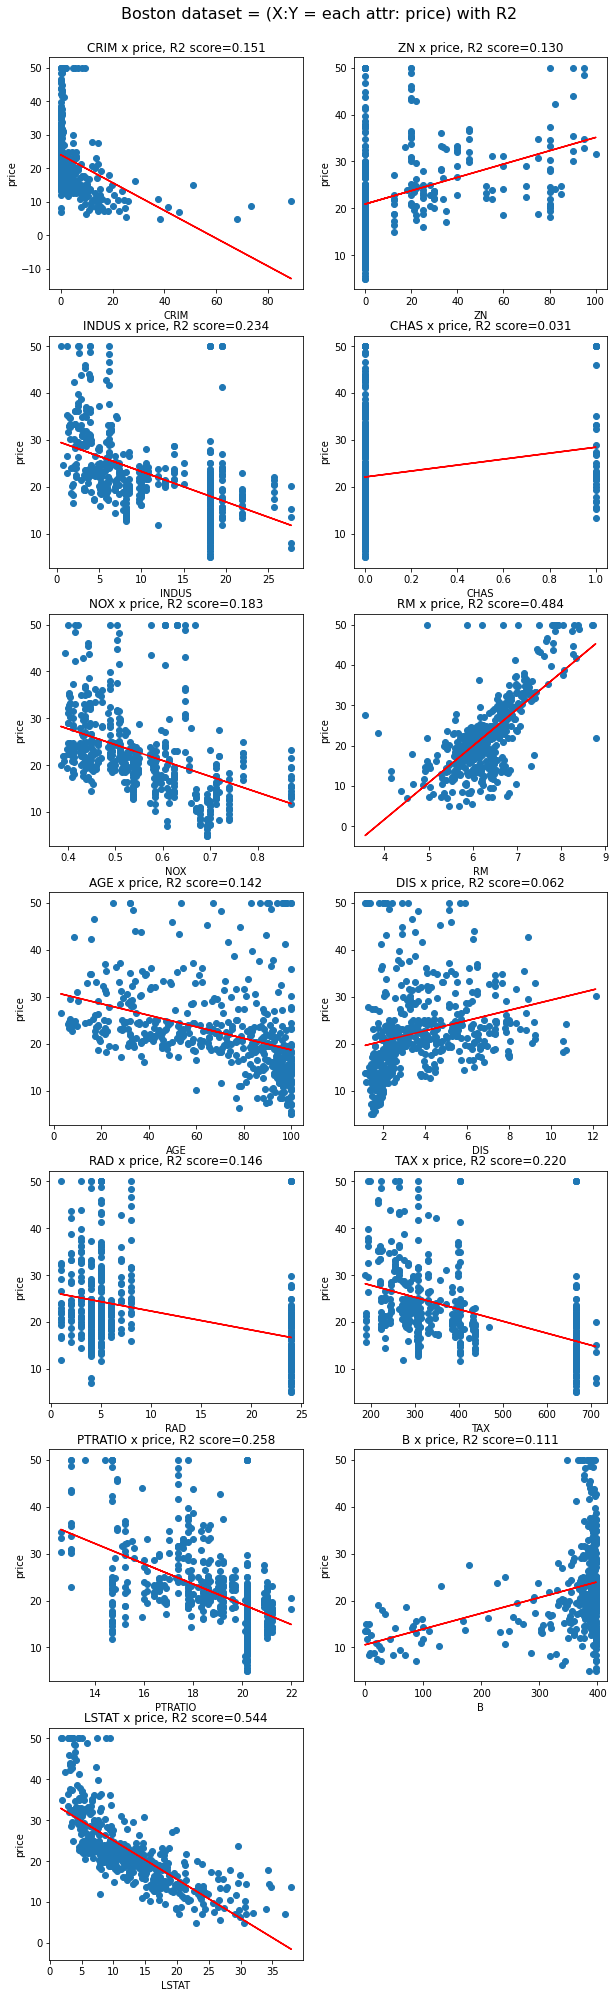

In [3]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,35))
fig.suptitle('Boston dataset = (X:Y = each attr: price) with R2', fontsize=16, y=0.9)

# boston dataset에서 i번째 attribute(column) 확인하기
for i in range(data.shape[1]):
    # i번째 attribute에 대한 data 및 이름
    single_attr, attr_name = data[:, i].reshape(-1, 1), boston['feature_names'][i]
    # 선형회귀모델
    estimator = LinearRegression()

    # x에 single_attr, y에는 price에 해당하는 데이터 대입 최소제곱법을 사용해 W, b 구하기
    estimator.fit(single_attr, price)

    # fit으로 구한 회귀계수 기반 회귀모델이 X값 대입했을 때 예측한 Y값 확인
    pred_price = estimator.predict(single_attr)

    # 결정계수 구하기
    score = metrics.r2_score(price, pred_price)

    # 그래프 그리기
    graph = fig.add_subplot(7, 2, i+1)
    graph.scatter(single_attr, price) # 실제 데이터 산포도
    graph.plot(single_attr, pred_price, color='red') # 선형회귀모델 추세선
    graph.set_title("{} x price, R2 score={:.3f}".format(attr_name, score))
    graph.set_xlabel(attr_name)
    graph.set_ylabel('price')

